# Employee Attrition and Performance Analysis

For a company, it is crucial to retain great employees. But, how should they do? 
First, they need to figure out what factors lead to employee turnover.
In this project, I will explore and analyze a fictional employee attrition dataset created by IBM data scientists in order to find factors affecting employee attrition and create an attrition prediction model using Decision Tree and Random Forest. 

*Data Source: https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset)


## Data

This dataset contains the following features:
* 'Age' : Employee's age
* 'Attrition' : If an employee quit
* 'BusinessTravel' : If an employee goes to business travel frequently, rarely or not at all
* 'DailyRate' : Daily wage
* 'Department' : R&D, Sales, HR
* 'DistanceFromHome' : Distance from home to work
* 'Education' : 1-Below College, 2-College, 3-Bachelor, 4-Master, 5-Doctor
* 'EducationField' : Employee's field of education
* 'EmployeeCount' : Number of employee
* 'EmployeeNumber' : Employee ID
* 'EnvironmentSatisfaction' : 1-Low, 2-Medium, 3-High, 4-Very High
* 'Gender' : Employee's gender
* 'HourlyRate' : Hourly wage
* 'JobInvolvement' : 1-Low, 2-Medium, 3-High, 4-Very High
* 'JobLevel' :  Level of job
* 'JobRole' : Employee's job position
* 'JobSatisfaction' : 1-Low, 2-Medium, 3-High, 4-Very High
* 'MaritalStatus' : Employee's marital status
* 'MonthlyIncome' : Monthly Income
* 'MonthlyRate' : Monthly Wage
* 'NumCompaniesWorked' : Number of companies worked at
* 'Over18' : If an employee is over 18
* 'OverTime' : If an employee works overtime
* 'PercentSalaryHike' : The parentage of change in salary between 2 year (2015, 2016)
* 'PerformanceRating' : 1-Low, 2-Good, 3-Excellent, 4-Outstanding
* 'RelationshipSatisfaction' : 1-Low, 2-Medium, 3-High, 4-Very High
* 'StandardHours' : Standard Hours
* 'StockOptionLevel' : How much company stocks you own from this company
* 'TotalWorkingYears' : Total number of years worked
* 'TrainingTimesLastYear' : Hours spent in training 
* 'WorkLifeBalance' : 1-Bad, 2-Good, 3-Better, 4-Best
* 'YearsAtCompany' : Total number of years worked at the company
* 'YearsInCurrentRole' : Total number of years in current role
* 'YearsSinceLastPromotion' : Number of years since last promotion
* 'YearsWithCurrManager' : Number of years worked with current manager

In [1]:
# import required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# import dataset

df = pd.read_csv('HR-Employee-Attrition.csv')

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

In [6]:
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

#### *Drop EmployeeCount, Over18 and StandardHours because everyone has the same values for those variables.
#### *Also drop EmployeeNumber.

In [7]:
df.drop(columns=['EmployeeCount','Over18','StandardHours','EmployeeNumber'], inplace=True)

In [8]:
# checking null values

display(df.isnull().any())

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesLastYear       False
WorkLifeBalance             False
YearsAtCompany              False
YearsInCurrentRole          False
YearsSinceLast

In [9]:
# transforming Yes to 1 and No to 0 for Attrition and Overtime
# transforming Male to 1 and Female to 0 for Gender

df['Attrition'].replace({'No': 0, 'Yes': 1}, inplace=True)
df['OverTime'].replace({'No': 0, 'Yes': 1}, inplace=True)
df['Gender'].replace({'Female': 0, 'Male': 1}, inplace=True)

In [10]:
df[['Attrition','OverTime','Gender']].head()

,Attrition,OverTime,Gender
0,1,1,0
1,0,0,1
2,1,1,1
3,0,1,0
4,0,0,1


## EDA

Let's create some visualizations to do exploratory analysis

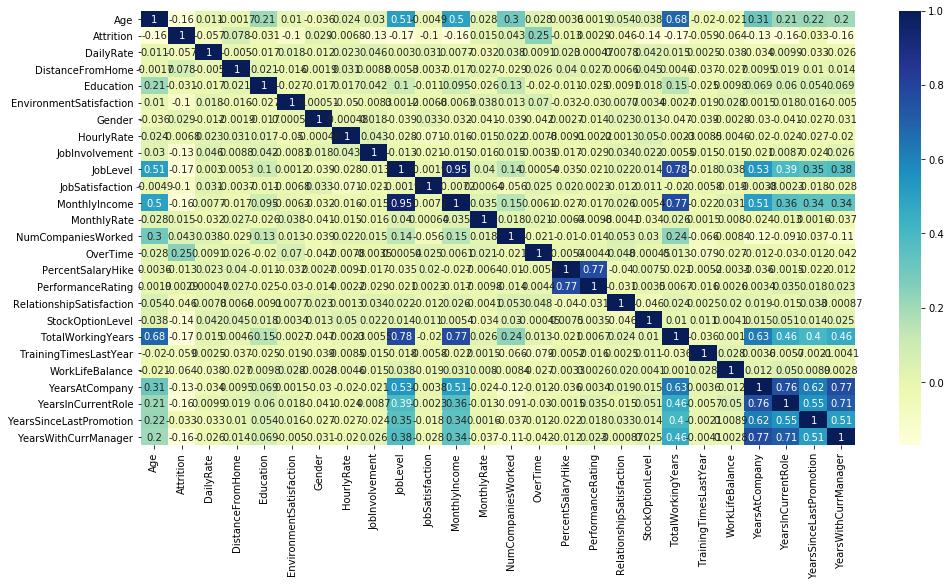

In [11]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")

#### * YearsAtCompany & YearsWithCurrManager,YearsAtCompany &YearsInCurrentRole, and YearsInCureentRole & YearsWithCurrManager are highly correlated.
#### * JobLevel & TotalWorkingYears, MonthlyIncome & TotalWorkingYears, and JobLevel & MonthlyIncome are also highly correlated because the longer you have worked, the more you earn.
#### * TotalWorkingYears & Age are of course highly correlated.
#### * PerformanceRating & PercentSalaryHike are highly correlated as well!

In [12]:
# dropping Monthly Income, Total Working Years, YearsAtCompany,YearsWithCurrManager, PerformanceRating to avoid multicollinearity

df.drop(columns=['MonthlyIncome','TotalWorkingYears', 'YearsAtCompany','YearsWithCurrManager','PerformanceRating'], inplace=True)

Text(0.5, 1.0, 'Attrition Proportion')

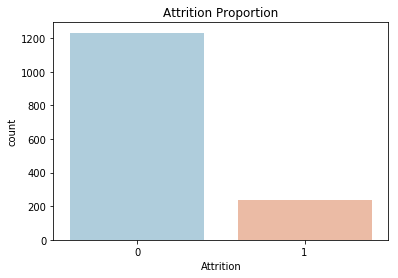

In [13]:
sns.countplot(x='Attrition', data=df, palette='RdBu_r')
plt.title('Attrition Proportion')

#### * The target variable (Attrition) is imbalanced. Oversampling or undersampling is needed before building a model.

Attrition,0,1
Gender,,
0,0.852041,0.147959
1,0.829932,0.170068
All,0.838776,0.161224


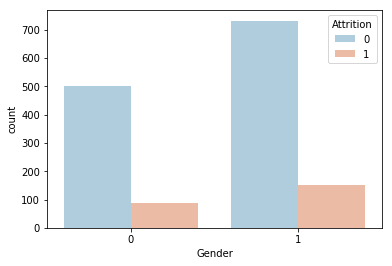

In [14]:
sns.countplot(x='Gender',data=df, hue='Attrition', palette='RdBu_r')
display(pd.crosstab(columns=[df.Attrition],index=[df.Gender],margins=True,normalize='index'))

#### * Not much difference between gender.

Attrition,0,1
OverTime,,
0,0.895636,0.104364
1,0.694712,0.305288
All,0.838776,0.161224


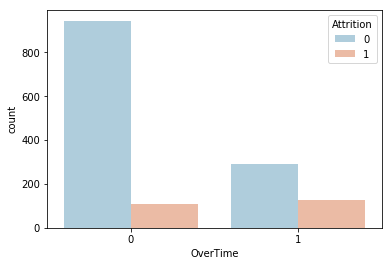

In [15]:
sns.countplot(x='OverTime',data=df, hue='Attrition', palette='RdBu_r')
display(pd.crosstab(columns=[df.Attrition],index=[df.OverTime],margins=True,normalize='index'))

Attrition,0,1
MaritalStatus,,
Divorced,0.899083,0.100917
Married,0.875186,0.124814
Single,0.744681,0.255319
All,0.838776,0.161224


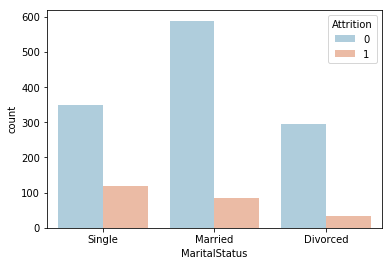

In [16]:
sns.countplot(x='MaritalStatus',data=df, hue='Attrition', palette='RdBu_r')
display(pd.crosstab(columns=[df.Attrition],index=[df.MaritalStatus],margins=True,normalize='index'))

Attrition,0,1
Education,,
1,0.817647,0.182353
2,0.843972,0.156028
3,0.826923,0.173077
4,0.854271,0.145729
5,0.895833,0.104167
All,0.838776,0.161224


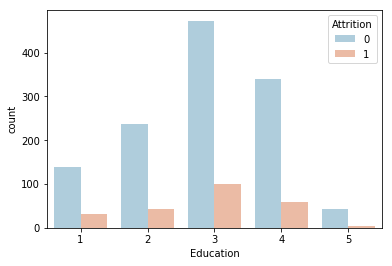

In [17]:
sns.countplot(x='Education',data=df, hue='Attrition', palette='RdBu_r')
display(pd.crosstab(columns=[df.Attrition],index=[df.Education],margins=True,normalize='index'))

Attrition,0,1
JobLevel,,
1,0.736648,0.263352
2,0.902622,0.097378
3,0.853211,0.146789
4,0.952830,0.047170
5,0.927536,0.072464
All,0.838776,0.161224


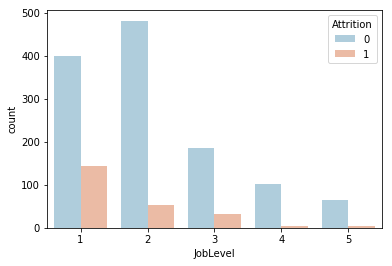

In [18]:
sns.countplot(x='JobLevel',data=df, hue='Attrition', palette='RdBu_r')
display(pd.crosstab(columns=[df.Attrition],index=[df.JobLevel],margins=True,normalize='index'))

Attrition,0,1
StockOptionLevel,,
0,0.755943,0.244057
1,0.906040,0.093960
2,0.924051,0.075949
3,0.823529,0.176471
All,0.838776,0.161224


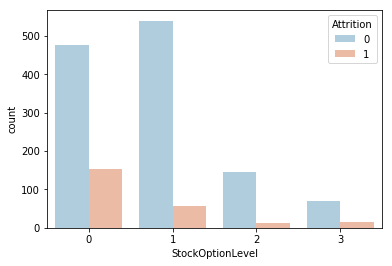

In [19]:
sns.countplot(x='StockOptionLevel',data=df, hue='Attrition', palette='RdBu_r')
display(pd.crosstab(columns=[df.Attrition],index=[df.StockOptionLevel],margins=True,normalize='index'))

Attrition,0,1
BusinessTravel,,
Non-Travel,0.920000,0.080000
Travel_Frequently,0.750903,0.249097
Travel_Rarely,0.850431,0.149569
All,0.838776,0.161224


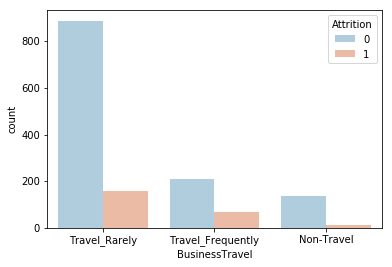

In [20]:
sns.countplot(x='BusinessTravel',data=df, hue='Attrition', palette='RdBu_r')
display(pd.crosstab(columns=[df.Attrition],index=[df.BusinessTravel],margins=True,normalize='index'))

Attrition,0,1
Department,,
Human Resources,0.809524,0.190476
Research & Development,0.861602,0.138398
Sales,0.793722,0.206278
All,0.838776,0.161224


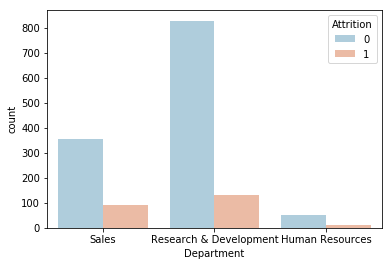

In [21]:
sns.countplot(x='Department',data=df, hue='Attrition', palette='RdBu_r')
display(pd.crosstab(columns=[df.Attrition],index=[df.Department],margins=True,normalize='index'))

Attrition,0,1
JobRole,,
Healthcare Representative,0.931298,0.068702
Human Resources,0.769231,0.230769
Laboratory Technician,0.760618,0.239382
Manager,0.950980,0.049020
Manufacturing Director,0.931034,0.068966
Research Director,0.975000,0.025000
Research Scientist,0.839041,0.160959
Sales Executive,0.825153,0.174847
Sales Representative,0.602410,0.397590


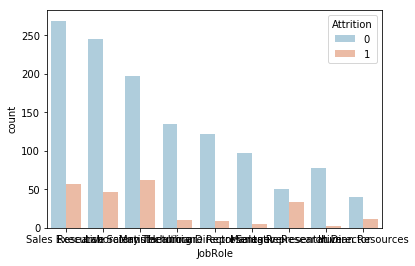

In [22]:
sns.countplot(x='JobRole',data=df, hue='Attrition', palette='RdBu_r')
display(pd.crosstab(columns=[df.Attrition],index=[df.JobRole],margins=True,normalize='index'))

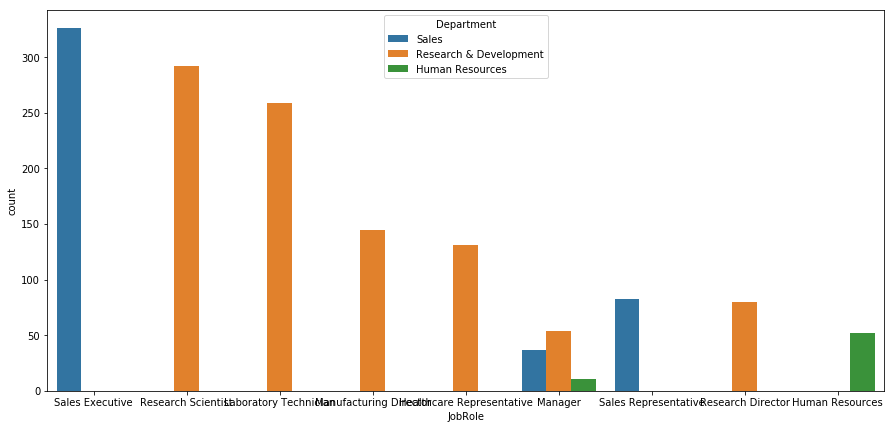

In [23]:
plt.figure(figsize=(15,7))
sns.countplot(x='JobRole', data=df, hue='Department')

#### * It looks like except for manager, each position belongs to unique department. I think including both variables would cause multicollinearity issue, so I am going to drop department variable.

In [24]:
# dropping Department

df.drop('Department',axis=1, inplace=True)

Attrition,0,1
NumCompaniesWorked,,
0,0.883249,0.116751
1,0.811900,0.188100
2,0.890411,0.109589
3,0.899371,0.100629
4,0.877698,0.122302
5,0.746032,0.253968
6,0.771429,0.228571
7,0.770270,0.229730
8,0.877551,0.122449


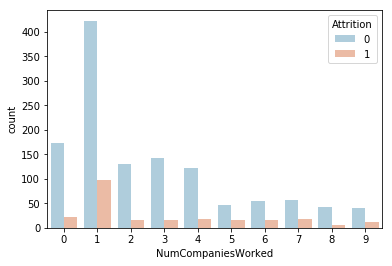

In [25]:
sns.countplot(x='NumCompaniesWorked',data=df, hue='Attrition', palette='RdBu_r')
display(pd.crosstab(columns=[df.Attrition],index=[df.NumCompaniesWorked],margins=True,normalize='index'))

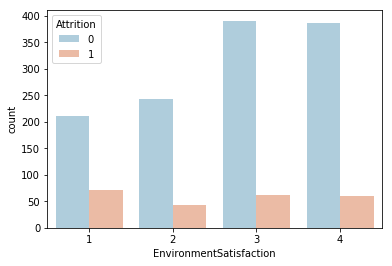

In [26]:
sns.countplot(x='EnvironmentSatisfaction',data=df, hue='Attrition', palette='RdBu_r')

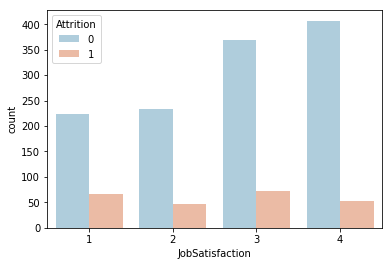

In [27]:
sns.countplot(x='JobSatisfaction',data=df, hue='Attrition', palette='RdBu_r')

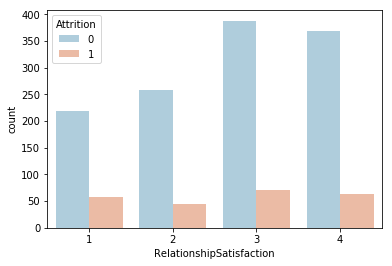

In [28]:
sns.countplot(x='RelationshipSatisfaction',data=df, hue='Attrition', palette='RdBu_r')

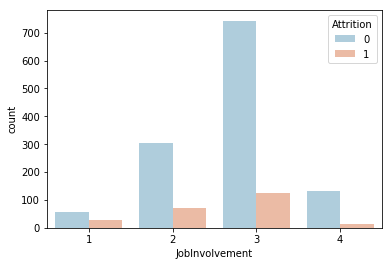

In [29]:
sns.countplot(x='JobInvolvement',data=df, hue='Attrition', palette='RdBu_r')

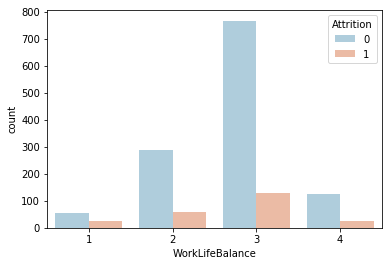

In [30]:
sns.countplot(x='WorkLifeBalance',data=df, hue='Attrition', palette='RdBu_r')

In [31]:
display(pd.crosstab(columns=[df.Attrition],index=[df.JobSatisfaction],margins=True,normalize='index'))
display(pd.crosstab(columns=[df.Attrition],index=[df.RelationshipSatisfaction],margins=True,normalize='index'))
display(pd.crosstab(columns=[df.Attrition],index=[df.EnvironmentSatisfaction],margins=True,normalize='index'))
display(pd.crosstab(columns=[df.Attrition],index=[df.JobInvolvement],margins=True,normalize='index'))
display(pd.crosstab(columns=[df.Attrition],index=[df.WorkLifeBalance],margins=True,normalize='index'))

Attrition,0,1
JobSatisfaction,,
1,0.771626,0.228374
2,0.835714,0.164286
3,0.834842,0.165158
4,0.886710,0.113290
All,0.838776,0.161224


Attrition,0,1
RelationshipSatisfaction,,
1,0.793478,0.206522
2,0.851485,0.148515
3,0.845316,0.154684
4,0.851852,0.148148
All,0.838776,0.161224


Attrition,0,1
EnvironmentSatisfaction,,
1,0.746479,0.253521
2,0.850174,0.149826
3,0.863135,0.136865
4,0.865471,0.134529
All,0.838776,0.161224


Attrition,0,1
JobInvolvement,,
1,0.662651,0.337349
2,0.810667,0.189333
3,0.855991,0.144009
4,0.909722,0.090278
All,0.838776,0.161224


Attrition,0,1
WorkLifeBalance,,
1,0.687500,0.312500
2,0.831395,0.168605
3,0.857783,0.142217
4,0.823529,0.176471
All,0.838776,0.161224


Text(0.5, 0, 'YearsInCurrentRole')

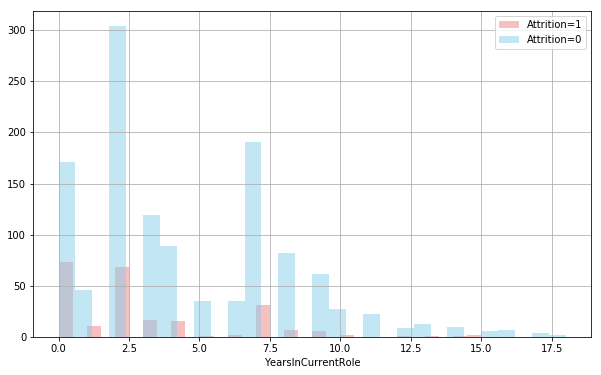

In [32]:
plt.figure(figsize=(10,6))
df[df['Attrition']==1]['YearsInCurrentRole'].hist(alpha=0.5,color='lightcoral',
                                              bins=30,label='Attrition=1')
df[df['Attrition']==0]['YearsInCurrentRole'].hist(alpha=0.5,color='skyblue',
                                              bins=30,label='Attrition=0')
plt.legend()
plt.xlabel('YearsInCurrentRole')

## Decision Tree

Now, I will transform categorical variables to dummy variables and train a decision tree.

In [33]:
# transforming categorical variables to dummies

cat = []

for i in range(0,len(df.columns)-1):
    
    if df.iloc[:,i].dtypes == 'object':
        cat.append(df.iloc[:,i].name)

print(cat)

['BusinessTravel', 'EducationField', 'JobRole', 'MaritalStatus']


In [34]:
final_data = pd.get_dummies(df,columns=cat,drop_first=True)

In [35]:
final_data.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,1,2,2,0,94,3,2,...,0,0,0,0,0,0,1,0,0,1
1,49,0,279,8,1,3,1,61,2,2,...,0,0,0,0,0,1,0,0,1,0
2,37,1,1373,2,2,4,1,92,2,1,...,0,1,0,0,0,0,0,0,0,1
3,33,0,1392,3,4,4,0,56,3,1,...,0,0,0,0,0,1,0,0,1,0
4,27,0,591,2,1,1,1,40,3,1,...,0,1,0,0,0,0,0,0,1,0


In [36]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 38 columns):
Age                                 1470 non-null int64
Attrition                           1470 non-null int64
DailyRate                           1470 non-null int64
DistanceFromHome                    1470 non-null int64
Education                           1470 non-null int64
EnvironmentSatisfaction             1470 non-null int64
Gender                              1470 non-null int64
HourlyRate                          1470 non-null int64
JobInvolvement                      1470 non-null int64
JobLevel                            1470 non-null int64
JobSatisfaction                     1470 non-null int64
MonthlyRate                         1470 non-null int64
NumCompaniesWorked                  1470 non-null int64
OverTime                            1470 non-null int64
PercentSalaryHike                   1470 non-null int64
RelationshipSatisfaction            1470 non-null int

In [37]:
# splitting train and test data

from sklearn.model_selection import train_test_split

X = final_data.drop('Attrition', axis=1)
y = final_data['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [38]:
# oversampling

from imblearn.over_sampling import SMOTE

oversampler=SMOTE(random_state=0)
X_train_smote,  y_train_smote = oversampler.fit_sample(X_train,y_train)

In [39]:
# training a single decision tree
from sklearn.tree import DecisionTreeClassifier
seed = 0
dtree = DecisionTreeClassifier()
dtree.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [40]:
# prediction and evaluation
predictions = dtree.predict(X_test)

from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))
print("Accuracy score: {}".format(accuracy_score(y_test, predictions)))

              precision    recall  f1-score   support

           0       0.87      0.81      0.84       371
           1       0.26      0.34      0.29        70

    accuracy                           0.74       441
   macro avg       0.56      0.58      0.57       441
weighted avg       0.77      0.74      0.75       441

[[302  69]
 [ 46  24]]
Accuracy score: 0.7392290249433107


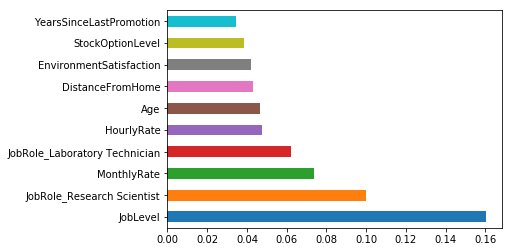

In [41]:
# plotting feature importance

feat_importances = pd.Series(dtree.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')


## Random Forest


In [42]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=1000)
rfc.fit(X_train_smote, y_train_smote)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [43]:
# prediction and evaluation

predictions_rf = rfc.predict(X_test)

print(classification_report(y_test,predictions_rf))
print(confusion_matrix(y_test,predictions_rf))
print("Accuracy score: {}".format(accuracy_score(y_test, predictions_rf)))


              precision    recall  f1-score   support

           0       0.87      0.97      0.91       371
           1       0.54      0.20      0.29        70

    accuracy                           0.85       441
   macro avg       0.70      0.58      0.60       441
weighted avg       0.81      0.85      0.81       441

[[359  12]
 [ 56  14]]
Accuracy score: 0.8458049886621315


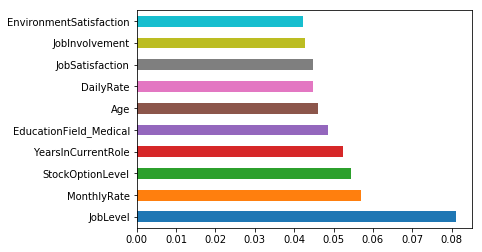

In [44]:
# plotting feature importance

feat_importances = pd.Series(rfc.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')

## Conclusion

The random forest model has higher accuracy and precision rates. According to the model, job level, monthly rate, stock option, and years in current role are top 4 important features. Even though the random forest model performs better than the decision tree model, precision and recall are quiet low. So, I'd recommend more engineering feature.